# Lab9- Scikit-Learn's Estimator Application Programming Interface (API) 

4/30/2019

## Introduction 
For the midterm you will use the fluxnet hourly/daily/monthly/annual data (more detail can be found at  https://fluxnet.fluxdata.org/data/fluxnet2015-dataset/) to find what factors influence the plant growth. I downloaded ? ? site fluxes datasets from the fluxnet datasites. These sites range from US, Europe and Asia. 

You will look into the relationship between GPP (gross primary production) with environmental factors such as air temperation, humidity, and biophysical parameters such as LAI evaportranpiration (latent heat flux) and other parameters. I attached two papers on this topic. 
We will search for answers for the three questions asked in the Baldocchi's paper 
1. how variable are carbon fluxes on a year to year basis? 
2. what are the biophysical factors that may cause interannual variability and/or temporal trends in carbon fluxes?;
3. how does the biophysical control on this carbon flux variability differ by climate and ecological spaces?
Are the the varibilities associated with the biphysical property (surface land cover type, LAI ) or the climate (associated with location, tropical, midlatitude or high latitute, maybe temperature or humidity). You will use both annual and monthly flux data.  Your code should be concise, use loops, functions or conditions statements as necessary. Add documents and comments for each cell. 


## Monthly Data Analysis - two sites

In [1]:
# Import necessary packages
import os
import urllib.request
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob
from scipy import stats

In [2]:
# change working directory to data and  create a list of all files containting keywork "FLX" in your working directory 
# os.chdir("data/")
os.chdir("C:/Users/wenge/Documents/myteaching/gtech/gtech385&785_2019S/Labs/data")
os.getcwd()


'C:\\Users\\wenge\\Documents\\myteaching\\gtech\\gtech385&785_2019S\\Labs\\data'

Question 4 - Download FLX*.csv files into /data subdirectory (10pts)
Use urllib.request to download the flux data for Harvard Forest and Hyytiala, Finland, Monrgan Moreole, University of Michgan Biological Station and Newgt in Colorado to your data directory. The location of the data is

http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv
http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv

In [3]:
# use `urllib` download flux data

# download flux data for Hyytiala
urllib.request.urlretrieve(url = "http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv",                  
    filename = "FLX_FI-Hyy_FLUXNET2015_SUBSET_YY_1996-2014_1-3.csv"
)
# download flux data for Hyytiala
urllib.request.urlretrieve(url = "http://www.geography.hunter.cuny.edu/~wenge/GTECH385-785/FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv",                  
    filename = "FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv"
)

('FLX_US-Ha1_FLUXNET2015_SUBSET_YY_1991-2012_1-3.csv',
 <http.client.HTTPMessage at 0x140019bf828>)

## Part I: Monthly Data Analysis

1. hange working directory to data and  create a list of all files containting keywork "FLX" in your working directory 
2. Print these lists of filenames.

In [3]:
# change working directory to data and  create a list of all files containting keywork "FLX" in your working directory 
# os.chdir("data/")
os.chdir("C:/Users/wenge/Documents/myteaching/gtech/gtech385&785_2019S/Labs/data")
os.getcwd()

#filelist = glob.glob("*FLX*")
filelist = glob.glob('*FLX*_MM_*')
print(filelist)

NameError: name 'os' is not defined

In [6]:
# define a function to read each dataset into a pandas dataframe
def read_data_pandas(mysite):
    #flux = pd.read_csv(mysite,parse_dates=['TIMESTAMP'],na_values=['-9999'])
    flux = pd.read_csv(mysite,parse_dates=['TIMESTAMP'],na_values=['-9999'],
                      usecols=['TIMESTAMP','TA_F','P_F','SW_IN_F','VPD_F','NEE_VUT_REF',
                                'RECO_NT_VUT_REF','GPP_NT_VUT_REF'])
    #print(flux.info())
    
    # Rename multiple columns in one go with a larger dictionary
    flux.rename(
        columns={
            'TA_F': 'TA',
            'P_F': 'P',
            'SW_IN_F': 'SW_IN',
            'VPD_F': 'VPD',
            'NEE_VUT_REF': 'NEE',
            'RECO_NT_VUT_REF': 'RECO',
            'GPP_NT_VUT_REF': 'GPP'
        },
        inplace=True
    )
    return(flux)


In [7]:
# define a function to plot the time series of environmental factors
def env_time_series(flux,site):
    # plot the time series of environmental factors - air temperature, precipitation
    # vapor pressure deficity and imcoming solar radiation 

    # set plot size for all plots that follow
    
    # set up the figure
    fig, axs = plt.subplots(4, 1, sharex=False, figsize=(8, 8) )
    fig.suptitle(site+' - Time Series of Environmental Factors', fontsize=16)

    # plot the first time series of all environmental variables
    axs[0].plot(flux['TIMESTAMP'],flux['TA'], color='b')
    axs[0].set_ylabel('Ta (deg C)')
    axs[0].set_xlabel('Year')
    
    axs[1].plot(flux['TIMESTAMP'],flux['P'], color='b')
    axs[1].set_ylabel('P (mm d-1)') # mm d-1 for monthly and daily data 
    axs[1].set_xlabel('Year')
        
    axs[2].plot(flux['TIMESTAMP'],flux['VPD'], color='b')
    axs[2].set_ylabel('VPD (hPa)')
    axs[2].set_xlabel('Year')
        
    axs[3].plot(flux['TIMESTAMP'],flux['SW_IN'], color='b')
    axs[3].set_ylabel('SW_in (W m-2)')
    axs[3].set_xlabel('Year')

In [8]:
# define a function to plot the time series of ecosystem variables
def eco_time_series(flux,site):
    # plot the time series of ecosyten variables - net ecosystem exchange, 
    # respiration and gross primariy production. The unit is  gC m-2 d-1 for monthly
    # and daily data, gC m-2 y-1 for annual data

    # set up the figure
    fig, axs = plt.subplots(3, 1, sharex=False, figsize=(8, 8) )
    fig.suptitle(site+' - Time Series of Ecosytem Exchange Variables', fontsize=16)

    #plot the time series of ecological parameters
    axs[0].plot(flux['TIMESTAMP'],flux['NEE'], color='b')
    axs[0].set_ylabel('NEE (gC m-2 d-1)')
    axs[0].set_xlabel('Year')
    
    axs[1].plot(flux['TIMESTAMP'],flux['RECO'], color='b')
    axs[1].set_ylabel('RE (gC m-2 d-1)')
    axs[1].set_xlabel('Year')
    
    axs[2].plot(flux['TIMESTAMP'],flux['GPP'], color='b')
    axs[2].set_ylabel('GPP (gC m-2 d-1)')
    axs[2].set_xlabel('Year')

In [9]:
# define a function to plot the time series of ecosystem variables
def eco_vs_env(flux,site):
    # plot the scatter plot between Gross primariy production with 
    # environmental factors - air temperature, precipitation
    # vapor pressure deficity and imcoming solar radiation
    
    # set up the figure
    fig, axs = plt.subplots(2, 2, sharex=False, figsize=(8, 8) )
    fig.suptitle(site+' - Relationship Between GPP and Environmental Variables', fontsize=16)    

    axs[0,0].scatter(flux['TA'],flux['GPP'],marker='.', color='blue')
    axs[0,0].set_ylabel('GPP(gC m-2 d-1)')
    axs[0,0].set_xlabel('Ta (deg C)')

    axs[1,0].scatter(flux['P'],flux['GPP'],marker='.', color='blue')
    axs[1,0].set_ylabel('GPP(gC m-2 d-1)')
    axs[1,0].set_xlabel('P (mm y-1)')

    axs[0,1].scatter(flux['VPD'],flux['GPP'],marker='.', color='blue')
    axs[0,1].set_ylabel('GPP(gC m-2 d-1)')
    axs[0,1].set_xlabel('VPD (hPa)')

    axs[1,1].scatter(flux['SW_IN'],flux['GPP'],marker='.', color='blue')
    axs[1,1].set_ylabel('GPP(gC m-2 d-1)')
    axs[1,1].set_xlabel('SW_in (W m-2)')



In [15]:
# combine all procedures together to make myplot function
def myplot(infile):
    myflux=read_data_pandas(infile)
    # print(myflux['TIMESTAMP'])
    mysite = infile[4:10]+infile[29:42]
    env_time_series(myflux,mysite)
    eco_time_series(myflux,mysite)
    eco_vs_env(myflux,mysite)

In [38]:
# supervised learning
# read the data and run supervised learning for all sites through a loop
for lis in filelist:
    print(lis)
    myflux = read_data_pandas(lis)
    linreg(myflux)


FLX_FI-Hyy_FLUXNET2015_SUBSET_MM_1996-2014_1-3.csv
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
(228, 8)
(228,)
(228,)
[0.32671612]
1.7302235798505405


NameError: name 'x' is not defined

## Supervised learning example: Simple linear regression¶

In [37]:
def linreg(flux):
    # Choose a class of model
    from sklearn.linear_model import LinearRegression
    # Choose model hyperparameters
    # model = LinearRegression(fit_intercept=True)
    model = LinearRegression()
    print(model)
    
    print(flux.shape)
    X = flux['TA']
    print(X.shape)

    y = flux['GPP']
    print(y.shape)

    X = x[:, np.newaxis]

    model.fit(X, y)
    print(model.coef_)
    print(model.intercept_)
    
    xfit = np.linspace(-1, 11)
    print,xfit
    
    Xfit = xfit[:, np.newaxis]
    yfit = model.predict(Xfit)
    
    plt.scatter(x, y)
    plt.plot(xfit, yfit);
    
    # validation 
    from sklearn.model_selection import train_test_split
    

FLX_FI-Hyy_FLUXNET2015_SUBSET_MM_1996-2014_1-3.csv
0      199601
1      199602
2      199603
3      199604
4      199605
5      199606
6      199607
7      199608
8      199609
9      199610
10     199611
11     199612
12     199701
13     199702
14     199703
15     199704
16     199705
17     199706
18     199707
19     199708
20     199709
21     199710
22     199711
23     199712
24     199801
25     199802
26     199803
27     199804
28     199805
29     199806
        ...  
198    201207
199    201208
200    201209
201    201210
202    201211
203    201212
204    201301
205    201302
206    201303
207    201304
208    201305
209    201306
210    201307
211    201308
212    201309
213    201310
214    201311
215    201312
216    201401
217    201402
218    201403
219    201404
220    201405
221    201406
222    201407
223    201408
224    201409
225    201410
226    201411
227    201412
Name: TIMESTAMP, Length: 228, dtype: object
FLX_US-Ha1_FLUXNET2015_SUBSET_MM_1991-2012_1-3.csv


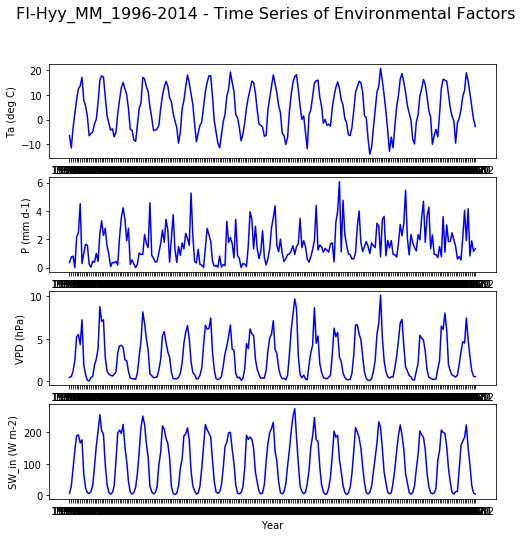

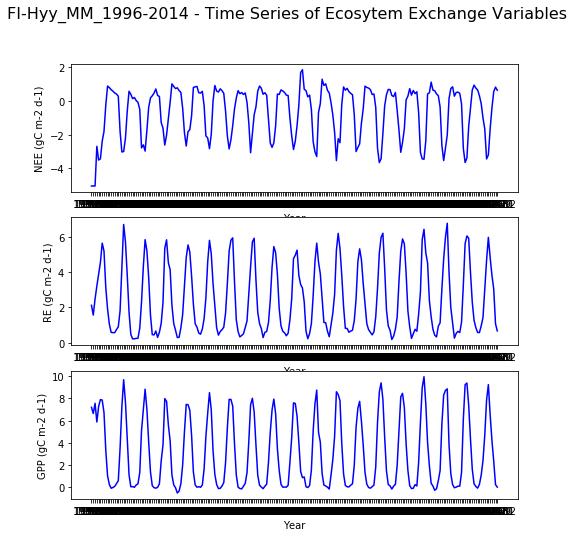

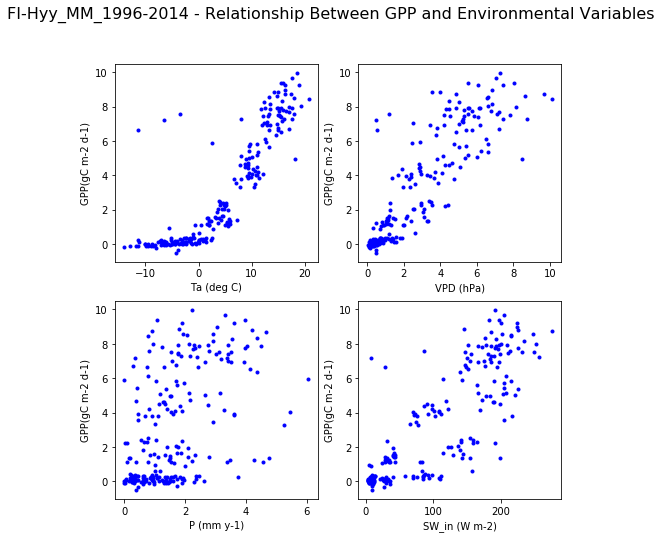

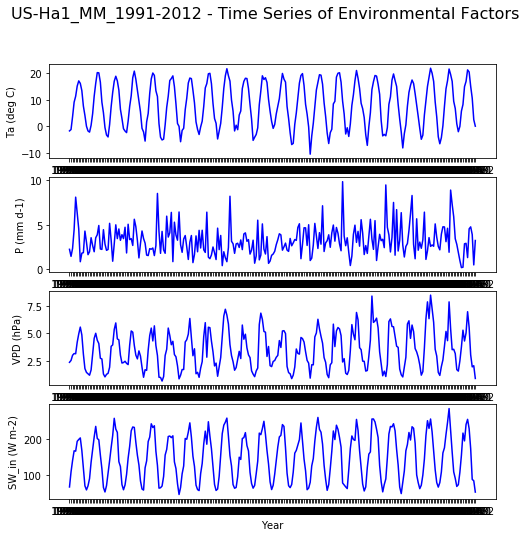

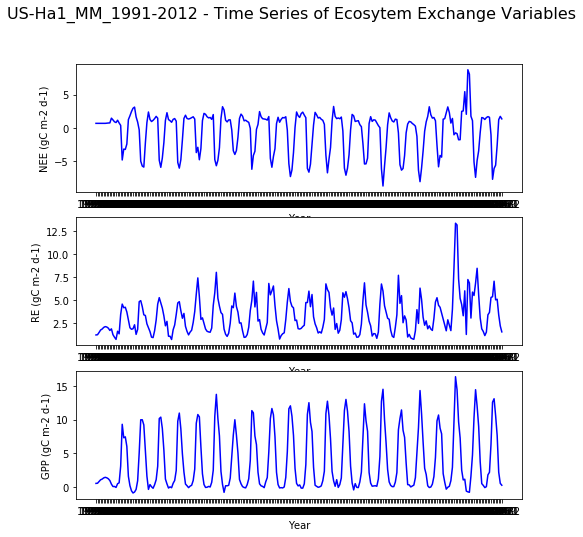

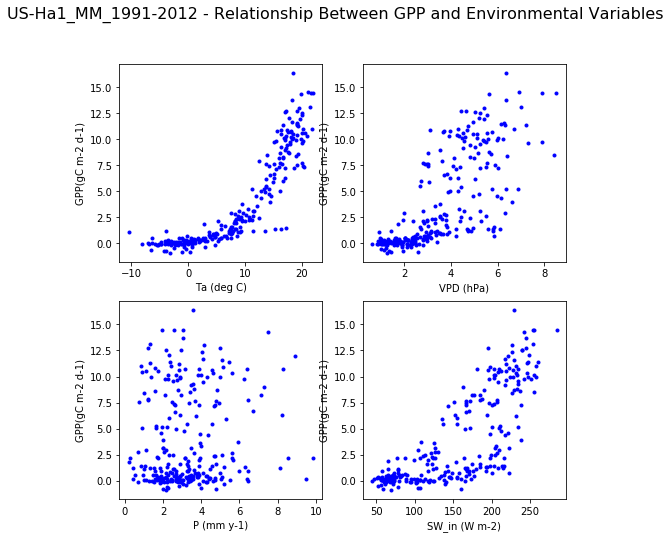

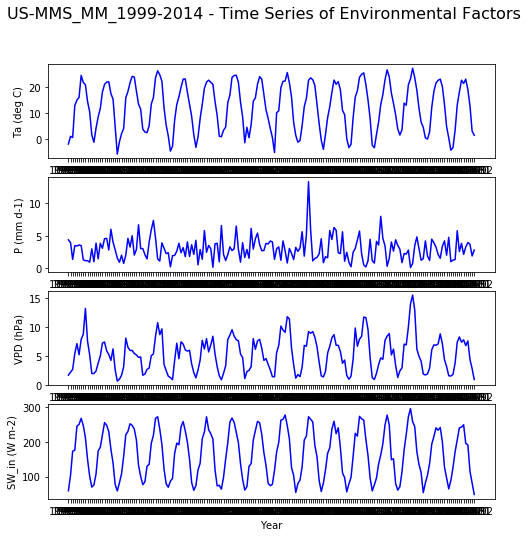

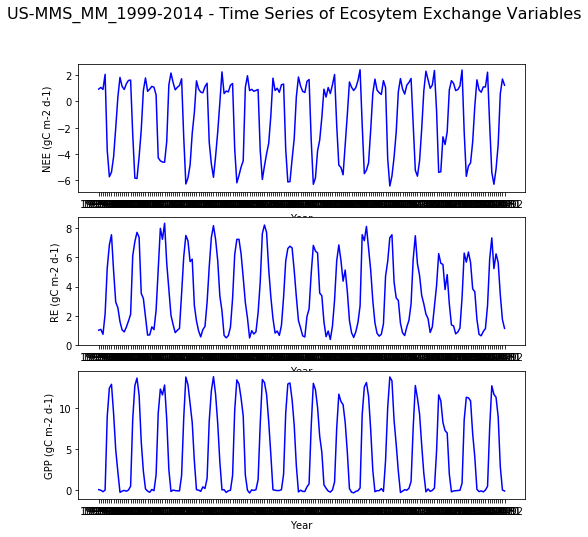

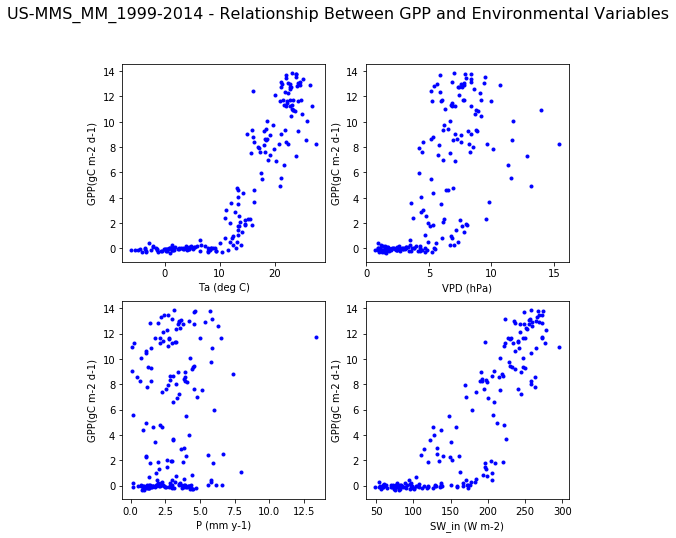

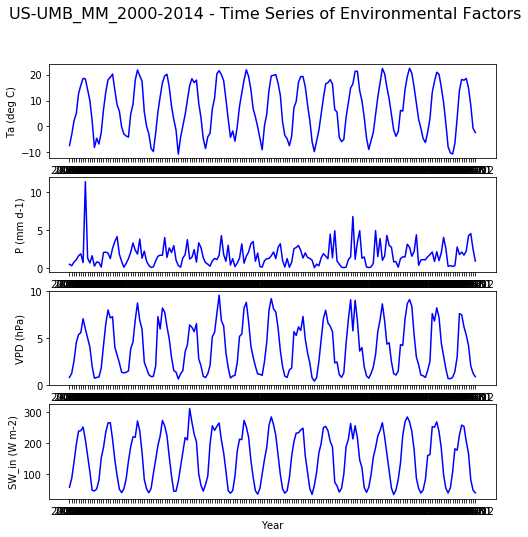

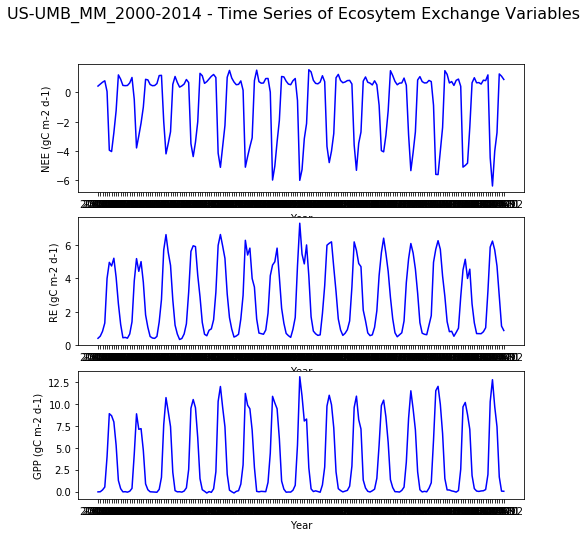

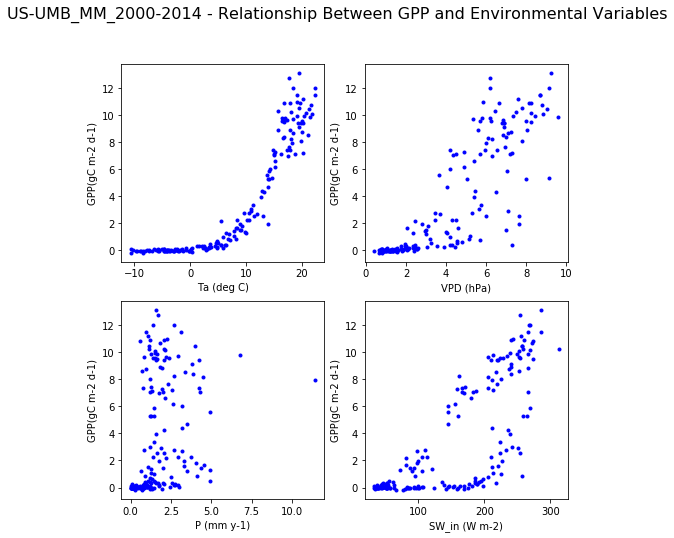

In [14]:
# read and plot for all sites through a loop
for lis in filelist:
    print(lis)
    myplot(lis)
    
    

## Supervised learning example: Naive_bayes learning  

In [2]:
import pandas as pd
# read data into pandas
# os.chdir("data")
iris = pd.read_csv('data/Iris.csv')
print(iris.head())

# make the data in the right format 
X_iris = iris.drop('species', axis=1)
print(X_iris.shape)

y_iris = iris['species']
print(y_iris.shape)

# choose the correct model 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_iris, y_iris)                  # 3. fit model to data
y_model = model.predict(X_iris) 

from sklearn.metrics import accuracy_score
accuracy_score(y_iris, y_model)

   sepal length  sepal width  petal length  petal width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 4)
(150,)


0.96